# Will it be an early Spring?

On February 2<sup>nd</sup> every year Punxsutawney Phil makes a prediction about if there will be an early Spring or if Winter will continue for 6 more weeks (till about mid-March). He is however not very accurate (well, according to [The Inner Circle](https://www.groundhog.org/inner-circle) he is 100% correct but the human handler may not interpret his response correctly). The overall goal is to be able to predict if it will be an early Spring.

For this project you must go through most steps in the checklist. You must write responses for all items however sometimes the item will simply be "does not apply". Some of the parts are a bit more nebulous and you simply show that you have done things in general (and the order doesn't really matter). Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Do not do the final part (launching the product) and your presentation will be done as information written in this document in a dedicated section, no slides or anything like that. It should however include the best summary plots/graphics/data points.

You are intentionally given very little information thus far. You must communicate with your client (me) for additional information as necessary. But also make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself).

Each group from 200-level and 300-level sections with the best results on the 10% of the data that I kept for myself will earn +5 extra credit (if multiple groups are close points may be given to multiple groups).

Frame The Problem
----

**1. Define the objective in business terms.**  
    ACME Seed company is trying to understand weather patterns for their new corn seed product. The company needs to guarantee if there will be an early spring based upon the farmers product yield. If weather permitting, the farmers can get 2 full harvests with the ACME corn seeds. Our objective is to understand when there will be an early spring and when there won't be.  
    
**2. How will your solution be used?**  
    If our model can successfully predict if there will be an early spring (before March 15th) the company will be able to send out a guarantee for the seeds making sales flourish.

**3. What are the current solutions/workarounds (if any)?**   
    Current solutions to knowing about early springs are very iffy. Weather is an always changing and hard to calculate thing. We are currently using Farmer's Almanacs, Meterologist Models, and Groundhogs to predict weather trends.  

**4. How should you frame this problem (supervised/unsupervised, online/offline, ...)?**  
    This is going to be a Supervised (Regression Based) problem with a most likely offline system. Supervised because of the historical data being put into our model and Regression based because of the dynamic changing rates of weather patterns. On top of this for the moment we are keeping it to an offline system because of the not needed constant input of new data to update.  

**5. How should performance be measured? Is the performance measure aligned with the business objective?**   
    Based on the ideology that we will be trying to guarantee ACME seeds that there will be an early spring. Performance will be measured by the Recall score of our model because of the True Positive nature that guarantees a result. We will disregard false negatives and say with 100% certainty that True Positives will be the best results for both the Company and the Farmers.  

**6. What would be the minimum performance needed to reach the business objective?**  
    Guaranteed Early Springs with very high certainty. There is a slight tolerance for error in missing a few early springs, but in contrast to that we do not want to inform the company that there will be an early spring if it actually in reality is still winter. No direct miminum performance has been classified but we hold high standards.  

**7. What are comparable problems? Can you reuse experience or tools?**  
    There are instances in other weather machine learning problems that could be useful such as prediciting percipitation patterns, but other than that not too much direct comparisons.  

**8. Is human expertise available?**     
    Humans on their own have almost no ability to be able to predict the weather. there may be Meterologist who know a bit more but prediciting a whole season is not an easy feat.  

**9. How would you solve the problem manually?**  
    This is definetly not a problem that is a good one to try and solve manually. You can really dedicate your life to understanding weather patterns and logging them, but machine learning is the best way to go about this problem.  
    
**10. List the assumptions you (or others) have made so far. Verify assumptions if possible.**  
    One assumption could be that we need to wait at least until the beginning of february every year to make the prediction. We must also assume that march 15th will be the date of guarantee every year.  
    

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy as sp
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, SGDClassifier

from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score

Get the Data
--

**1. List the data you need and how much you need**  
We need data from January 1st to February 2nd. The data needs to be for each day. The data must contain as many features relevant to the weather as possible. We also need to know which years in the past were early springs or not. Our data should go back as far as possible.  

**2. Find and document where you can get that data**  
Done. Provided by an intern.  

**3. Get access authorizations**  
Done.  

**4. Create a workspace (with enough storage space)**  
Done. Visual Studio Code Jupyter Notebooks

**5. Get the data**  
Done.  

**6. Convert the data to a format you can easily manipulate (without changing the data itself)**

In [2]:
def load_weather_data():
    """
    Loads the CSV file which contains our data for weather.
    """
    return pd.read_csv('weather.csv')

In [3]:
def load_phil_data():
    """
    Loads the CSV file which contains our data for phil's predictions.
    """
    return pd.read_csv('phil_pred.csv')

In [4]:
def load_spring_data():
    """
    Loads the CSV file which contains our data for actuality of season.
    """
    return pd.read_csv('early_spring.csv')

In [5]:
def read_temperature_data(filename):
    """
    Reads temperature data from the given file. M values are assumed to be
    missing values (returned as nan). T values are trace values and returned as
    0.0025 inches for precipitation and snowfall and 0.025 inches for snowdepth
    (see https://www.chicagotribune.com/news/weather/ct-wea-asktom-0415-20180413-column.html).
    """
    def convert_precipitation(raw):
        return 0.0025 if raw == 'T' else np.nan if raw == 'M' else pd.to_numeric(raw)
    def convert_depth(raw):
        return 0.025 if raw == 'T' else np.nan if raw == 'M' else pd.to_numeric(raw)
    return pd.read_csv(filename, na_values=['M'], parse_dates=[0],
        converters={
            "precipitation":convert_precipitation,
            "snowfall":convert_precipitation,
            "snowdepth":convert_depth,
        })

In [6]:
weather_data = load_weather_data()
phil_data = load_phil_data()
spring_data = load_spring_data()

**7. Ensure sensitive information is deleted or protected (e.g. anonymized)**   
Not needed.

**8. Check the size and type of data (time series, geographical, ...)**  
weather_data:
We have 7 features, 6 of which are floats. The date feature is a string. There are 2211 entries in total.

phil_data (groundhog's predictions):
There are 2 features. One is an int and the other is a bool. There are 60 entries in total.

spring_data (which years were early spring):
There are 2 features. One is an int and the other is a bool. There are 67 entries in total.


In [7]:
weather_data.info()
weather_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2211 non-null   object 
 1   max_temp       2167 non-null   float64
 2   min_temp       2170 non-null   float64
 3   avg_temp       2160 non-null   float64
 4   precipitation  2208 non-null   float64
 5   snowfall       2198 non-null   float64
 6   snowdepth      2174 non-null   float64
dtypes: float64(6), object(1)
memory usage: 121.0+ KB


,max_temp,min_temp,avg_temp,precipitation,snowfall,snowdepth
count,2167.000000,2170.000000,2160.000000,2208.000000,2198.000000,2174.000000
mean,36.191970,18.410138,27.284028,0.111475,0.463889,2.503059
std,12.252389,12.755078,11.704472,0.228599,1.196003,4.282987
min,-6.000000,-26.000000,-15.000000,0.000000,0.000000,0.000000
25%,28.000000,10.000000,19.375000,0.000000,0.000000,0.000000
50%,36.000000,20.000000,28.000000,0.010000,0.000000,1.000000
75%,44.000000,28.000000,35.125000,0.120000,0.500000,3.000000
max,75.000000,51.000000,60.000000,2.560000,21.000000,30.000000


In [8]:
weather_data['date'].apply(lambda x: type(x) == str).all()

True

In [9]:
phil_data.info()
phil_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        60 non-null     int64
 1   prediction  60 non-null     bool 
dtypes: bool(1), int64(1)
memory usage: 668.0 bytes


,year
count,60.000000
mean,1984.266667
std,21.866984
min,1947.000000
25%,1966.750000
50%,1983.500000
75%,2003.250000
max,2021.000000


In [10]:
spring_data.info()
spring_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   year          67 non-null     int64
 1   early_spring  67 non-null     bool 
dtypes: bool(1), int64(1)
memory usage: 731.0 bytes


,year
count,67.000000
mean,1983.059701
std,22.206934
min,1947.000000
25%,1964.500000
50%,1982.000000
75%,2002.500000
max,2021.000000


**9. Sample a test set, put it aside, and never look at it (no data snooping!)**  

In [11]:
#this line is used for converting strings to datetimes
weather_data['date'] = weather_data['date'].astype('datetime64[ns]')

In [12]:
#function that groups date sets of 33 into individual years
def convert_dates_to_year():
    weather_data['year'] = weather_data['date'].dt.year

    days = []
    for year in range(0, 67):
        for day in range (0, 33):
            days.append(day)

    weather_data['day_of_year'] = days

In [13]:
convert_dates_to_year()

In [14]:
weather_data.drop(columns=['date'], inplace=True)

In [15]:
pivot_weather = weather_data.pivot(index='year', columns='day_of_year')
pivot_weather

max_temp                                                        \
day_of_year       0     1     2     3     4     5     6     7     8     9    
year                                                                         
1947            30.0  44.0  54.0  42.0  33.0  33.0  34.0  35.0  31.0  30.0   
1948            46.0  41.0  32.0  34.0  34.0  32.0  32.0  41.0  49.0  33.0   
1949            31.0  34.0  40.0  43.0  55.0  54.0  49.0  56.0  61.0  53.0   
1950            49.0  53.0  61.0  69.0  54.0  53.0  43.0  30.0  48.0  59.0   
1951            40.0  46.0  52.0  50.0  41.0  46.0  36.0  23.0  30.0  46.0   
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2017            42.0  43.0  45.0  46.0  40.0  23.0  16.0  15.0  16.0  29.0   
2018            12.0  12.0  13.0  25.0  17.0   8.0   8.0  23.0  34.0  37.0   
2019            62.0  51.0  41.0  34.0  42.0  49.0  43.0  43.0  56.0  33.0   
2020            39.0  37.0  49.0  50.0  47.0  37.0  41.0  34.0  33.0  39.0   
2021            33.0  49.0  50.0  40.0  35.0  34.0  35.0  35.0  32.0  34.0   

             ... snowdepth                                                     \
day_of_year  ...        23      24      25     26     27     28     29     30   
year         ...                                                                
1947         ...       NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   
1948         ...     8.000  10.000  10.000  9.000  9.000  8.000  5.000  5.000   
1949         ...     0.000   0.000   0.000  0.000  0.000  0.025  0.025  2.000   
1950         ...     0.000   0.000   0.000  0.000  0.000  0.000  0.000  0.000   
1951         ...     0.000   0.025   1.000  1.000  0.025  0.000  0.000  0.025   
...          ...       ...     ...     ...    ...    ...    ...    ...    ...   
2017         ...     0.025   0.000   0.000  0.025  2.000  2.000  2.000  4.000   
2018         ...     0.000   0.000   0.000  0.000  0.000  0.000  1.000  1.000   
2019         ...     0.000   1.000   0.025  1.000  0.025  0.025  0.025  0.000   
2020         ...     0.000   0.000   0.000  0.025  0.000  0.025  0.025  0.000   
2021         ...     0.000   0.025   0.000  0.000  0.000  0.000  0.025  0.000   

                           
day_of_year     31     32  
year                       
1947           NaN  1.000  
1948         5.000  4.000  
1949         2.000  2.000  
1950           NaN  0.000  
1951         0.025  0.025  
...            ...    ...  
2017         1.000  0.000  
2018         0.025  1.000  
2019         1.000  2.000  
2020         0.000  0.025  
2021         1.000  3.000  

[67 rows x 198 columns]

In [16]:
pivot_weather.columns = ["_".join(str(x) for x in a) for a in pivot_weather.columns.to_flat_index()]

In [17]:
def merge_spring_and_weather_data():
    return pd.merge(pivot_weather, spring_data, on='year', how='inner')

In [18]:
data = merge_spring_and_weather_data()
data

,year,max_temp_0,max_temp_1,max_temp_2,max_temp_3,max_temp_4,max_temp_5,max_temp_6,max_temp_7,max_temp_8,...,snowdepth_24,snowdepth_25,snowdepth_26,snowdepth_27,snowdepth_28,snowdepth_29,snowdepth_30,snowdepth_31,snowdepth_32,early_spring
0,1947,30.0,44.0,54.0,42.0,33.0,33.0,34.0,35.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,True
1,1948,46.0,41.0,32.0,34.0,34.0,32.0,32.0,41.0,49.0,...,10.000,10.000,9.000,9.000,8.000,5.000,5.000,5.000,4.000,False
2,1949,31.0,34.0,40.0,43.0,55.0,54.0,49.0,56.0,61.0,...,0.000,0.000,0.000,0.000,0.025,0.025,2.000,2.000,2.000,True
3,1950,49.0,53.0,61.0,69.0,54.0,53.0,43.0,30.0,48.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,False
4,1951,40.0,46.0,52.0,50.0,41.0,46.0,36.0,23.0,30.0,...,0.025,1.000,1.000,0.025,0.000,0.000,0.025,0.025,0.025,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2017,42.0,43.0,45.0,46.0,40.0,23.0,16.0,15.0,16.0,...,0.000,0.000,0.025,2.000,2.000,2.000,4.000,1.000,0.000,False
63,2018,12.0,12.0,13.0,25.0,17.0,8.0,8.0,23.0,34.0,...,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.025,1.000,False
64,2019,62.0,51.0,41.0,34.0,42.0,49.0,43.0,43.0,56.0,...,1.000,0.025,1.000,0.025,0.025,0.025,0.000,1.000,2.000,True
65,2020,39.0,37.0,49.0,50.0,47.0,37.0,41.0,34.0,33.0,...,0.000,0.000,0.025,0.000,0.025,0.025,0.000,0.000,0.025,True


In [19]:
data = data[data['year'] != 2001]

In [20]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=250)

Explore the Data
--

**1. Copy the data for exploration, downsampling to a manageable size if necessary.**  
Downsizing not necessary

**2. Study each attribute and its characteristics: Name; Type (categorical, numerical, 
bounded, text, structured, ...); % of missing values; Noisiness and type of noise (stochastic, outliers, rounding errors, ...); 
Usefulness for the task; Type of distribution (Gaussian, uniform, logarithmic, ...)**  

In [21]:
train_set.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 53 to 25
Data columns (total 200 columns):
 #    Column            Dtype  
---   ------            -----  
 0    year              int64  
 1    max_temp_0        float64
 2    max_temp_1        float64
 3    max_temp_2        float64
 4    max_temp_3        float64
 5    max_temp_4        float64
 6    max_temp_5        float64
 7    max_temp_6        float64
 8    max_temp_7        float64
 9    max_temp_8        float64
 10   max_temp_9        float64
 11   max_temp_10       float64
 12   max_temp_11       float64
 13   max_temp_12       float64
 14   max_temp_13       float64
 15   max_temp_14       float64
 16   max_temp_15       float64
 17   max_temp_16       float64
 18   max_temp_17       float64
 19   max_temp_18       float64
 20   max_temp_19       float64
 21   max_temp_20       float64
 22   max_temp_21       float64
 23   max_temp_22       float64
 24   max_temp_23       float64
 25   max_temp_24       float64

In [22]:
missing_values = train_set.isnull().sum() / len(train_set) * 100

In [23]:
variables = {}
attrs = ['max_temp', 'min_temp', 'avg_temp', 'precipitation', 'snowfall', 'snowdepth']
for i, attr in enumerate(attrs):
    start = 1+(33*i)
    s = missing_values[start:start+33]
    s = pd.DataFrame(s)
    variables[attr] = s

variables

{'max_temp':                     0
 max_temp_0   0.000000
 max_temp_1   0.000000
 max_temp_2   1.923077
 max_temp_3   0.000000
 max_temp_4   0.000000
 max_temp_5   1.923077
 max_temp_6   3.846154
 max_temp_7   0.000000
 max_temp_8   1.923077
 max_temp_9   0.000000
 max_temp_10  1.923077
 max_temp_11  0.000000
 max_temp_12  0.000000
 max_temp_13  0.000000
 max_temp_14  0.000000
 max_temp_15  0.000000
 max_temp_16  0.000000
 max_temp_17  0.000000
 max_temp_18  1.923077
 max_temp_19  0.000000
 max_temp_20  3.846154
 max_temp_21  0.000000
 max_temp_22  0.000000
 max_temp_23  0.000000
 max_temp_24  0.000000
 max_temp_25  0.000000
 max_temp_26  0.000000
 max_temp_27  0.000000
 max_temp_28  0.000000
 max_temp_29  0.000000
 max_temp_30  0.000000
 max_temp_31  0.000000
 max_temp_32  0.000000,
 'min_temp':                     0
 min_temp_0   1.923077
 min_temp_1   0.000000
 min_temp_2   1.923077
 min_temp_3   0.000000
 min_temp_4   0.000000
 min_temp_5   1.923077
 min_temp_6   0.000000
 min_temp

In [24]:
variables['max_temp'].describe()

,0
count,33.000000
mean,0.524476
std,1.103962
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.846154


In [25]:
variables['min_temp'].describe()

,0
count,33.000000
mean,0.349650
std,0.753221
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.923077


In [26]:
variables['avg_temp'].describe()

,0
count,33.000000
mean,0.815851
std,1.362394
min,0.000000
25%,0.000000
50%,0.000000
75%,1.923077
max,3.846154


In [27]:
variables['precipitation'].describe()

,0
count,33.000000
mean,0.174825
std,0.561418
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.923077


In [28]:
variables['snowfall'].describe()

,0
count,33.000000
mean,0.641026
std,1.331190
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.846154


In [29]:
variables['snowdepth'].describe()

,0
count,33.000000
mean,2.039627
std,1.590132
min,0.000000
25%,1.923077
50%,1.923077
75%,1.923077
max,5.769231


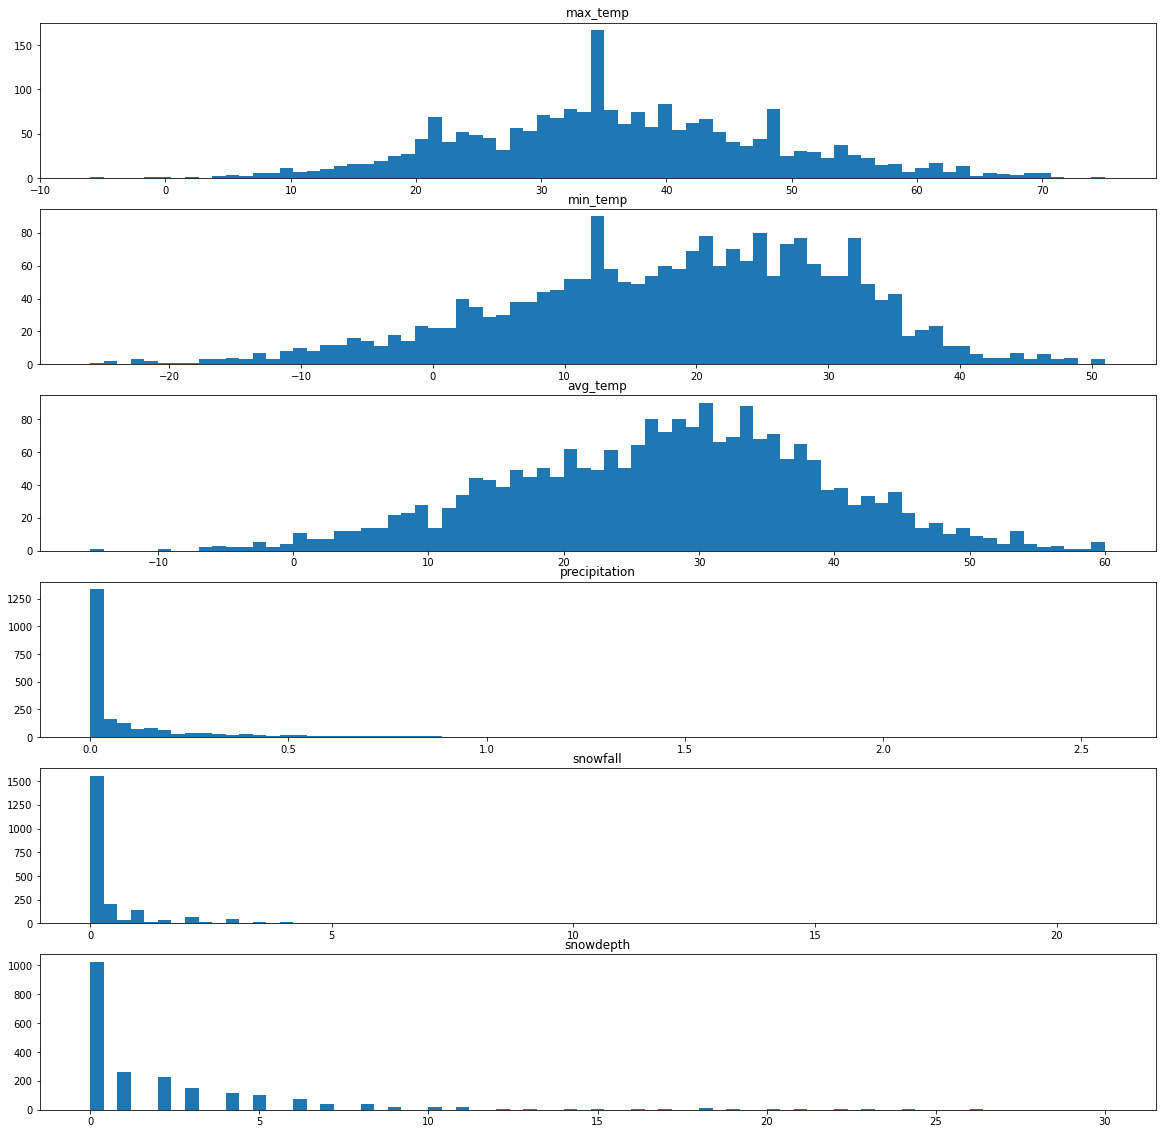

In [30]:
plt.figure(figsize=(20,20))
for i, attr in enumerate(attrs):
    plt.subplot(6, 1, i+1)
    plt.title(attr)
    plt.hist(weather_data[attr], bins=75)

Attributes and Characteristics
---
**early_spring** -- Type: Bool, Missing Values: Mean = None, Noise: None

**max_temp** -- Type: Float64, Missing Values: Mean = 1.99, Type of Distribution: Gaussian Distribution, No Skew.

**min_temp** -- Type: Float64, Missing Values: Mean = 1.85, Type of Distribution: Gaussian Distribution, Left Skewed.

**average_temp** -- Type: Float64, Missing Values: Mean = 2.30, Type of Distribution: Gaussian Distribution, Left Skewed.

**percipitation** -- Type: Float64, Missing Values: Mean = 0.13, Type of Distribution: Logarithmic Distribution.

**snowdepth** -- Type: Float64, Missing Values: Mean = 0.58, Type of Distribution: Logarithmic Distribution.

**snowfall** -- Type: Float64, Missing Values: Mean = 1.67, Type of Distribution: Logarithmic Distribution.

**year** -- Type: Int64, Missing Values: Mean = None, Noise: None

**Usefullness for Task** -- Early Spring will be very useful as it is our target attribute that we will base our future reasoning on. To find out coorelations between an early spring and weather pattern we must utilize all of the given features that contain weather events and temperatures. We have the ability to utilize all features within our dataset.

In [31]:
train_set.describe()

,year,max_temp_0,max_temp_1,max_temp_2,max_temp_3,max_temp_4,max_temp_5,max_temp_6,max_temp_7,max_temp_8,...,snowdepth_23,snowdepth_24,snowdepth_25,snowdepth_26,snowdepth_27,snowdepth_28,snowdepth_29,snowdepth_30,snowdepth_31,snowdepth_32
count,52.000000,52.000000,52.000000,51.000000,52.000000,52.000000,51.000000,50.000000,52.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,52.000000
mean,1981.846154,39.211538,38.519231,38.176471,37.673077,37.192308,36.705882,36.240000,35.461538,36.137255,...,3.375980,3.180392,3.082353,3.218627,3.240196,3.277941,3.063725,3.201471,3.065686,2.870673
std,22.013708,12.101428,10.294660,11.014002,11.578752,11.616483,10.538110,10.387512,13.373168,11.936532,...,5.489526,4.808628,4.414655,4.706731,4.650944,4.722318,5.022547,5.036441,5.041208,4.959616
min,1947.000000,12.000000,12.000000,13.000000,13.000000,13.000000,8.000000,8.000000,2.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.250000,32.000000,32.000000,31.500000,31.000000,31.000000,30.000000,30.250000,26.500000,25.500000,...,0.000000,0.025000,0.025000,0.012500,0.025000,0.025000,0.012500,0.025000,0.025000,0.000000
50%,1979.000000,37.500000,39.500000,37.000000,35.500000,36.000000,35.000000,34.500000,35.000000,37.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.025000,1.000000
75%,2002.250000,44.000000,45.250000,46.000000,43.000000,43.000000,43.000000,41.000000,43.000000,45.500000,...,4.000000,4.000000,5.000000,4.500000,4.000000,5.000000,4.000000,4.500000,4.000000,4.000000
max,2021.000000,70.000000,64.000000,64.000000,71.000000,66.000000,60.000000,64.000000,69.000000,67.000000,...,26.000000,20.000000,21.000000,23.000000,22.000000,24.000000,24.000000,24.000000,24.000000,24.000000


**3. For supervised learning tasks, identify the target attribute(s)**  

The target attributes are going to be max_temp, min_temp, avg_temp, precipitation, snowfall, snowdepth. These attributes are useful for solving the problem. year is probably not going to have a meaningful correlation with early_spring and early_spring itself will be the label.

**4. Visualize the data**  


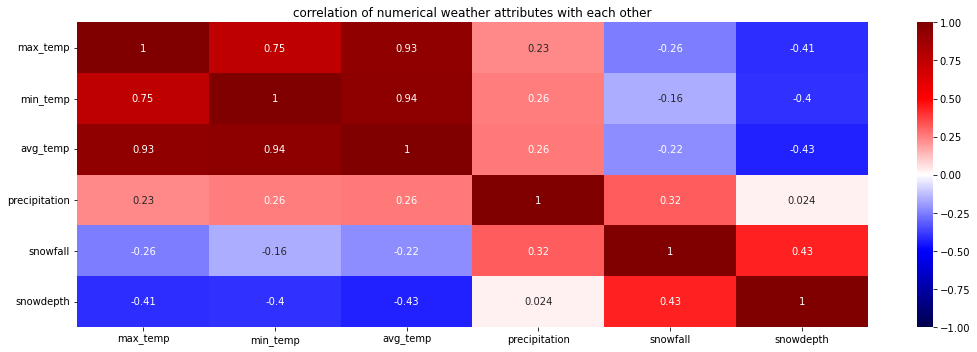

In [32]:
plt.figure(figsize=(15, 5))
plt.title('correlation of numerical weather attributes with each other')
sns.heatmap(weather_data[attrs].corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')
plt.tight_layout()

In [33]:
def add_number_to_attr(attr, start, stop):
    return [attr + '_' + str(i) for i in range(start, stop)]

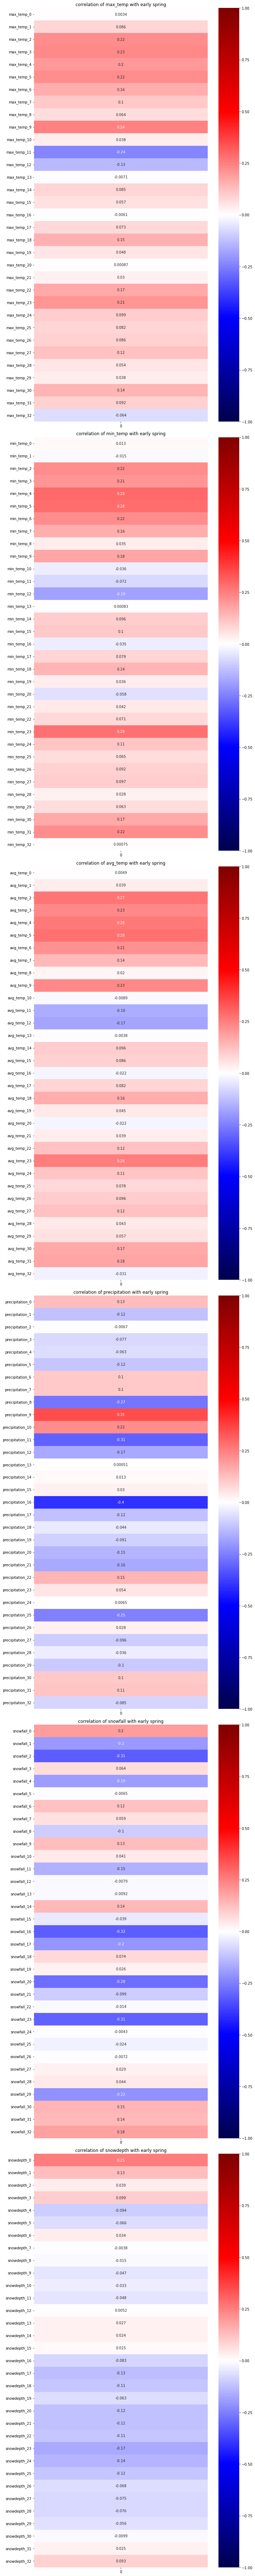

In [34]:
plt.figure(figsize=(10, 100))
for i, attr in enumerate(attrs):
    plt.subplot(len(attrs), 1, i+1)
    plt.title('correlation of ' + attr + ' with early spring')
    correlations_with_label = train_set[add_number_to_attr(attr, 0, 33)].corrwith(train_set['early_spring'])
    correlations_with_label = pd.DataFrame(correlations_with_label)
    sns.heatmap(correlations_with_label, annot=True, vmin=-1, vmax=1, cmap='seismic')
    plt.tight_layout()

**5. Study the correlations between attributes**  

avg_temp highly correlates with both min_temp and max_temp at above 0.9. min_temp and max_temp have the next highest correlation with each other at 0.75. The temperature attributes probably correlate with each other because the extremes don't fall far from the average.

The next highest correlation is snowfall and snowdepth. This is probably because most of the time snowdepth is equal to or greater than snowfall and a high snowfall means there will be a high snowdepth.

Precipitation has no correlation with snowdepth at all. This is probably because whether or not it snowed the previous day doesn't affect whether or not it will rain the current day. However, snowfall does have a correlation with precipitation because rain can turn into snow and snow can turn into rain if the temperature changes.

max_temp, min_temp, and avg_temp correlate almost the same with precipitation, snowfall, and snowdepth. This is probably because they all correlate with each other. I will call these three attributes the temperature.

The temperature has a slight to moderate positive correlation with precipitation because it's more likely to rain if it's warmer.

The temperature has a slight to moderate negative correlation with snowfall because it's more likely to snow if it's colder.

The temperature has a moderate to strong negative correlation with snowdepth. The reason this correlation is stronger than the correlation with snowfall is probably because it's more likely that snow has accumulated compared to the probability that it is currently snowing.

The temperature from January 1st to January 10th correlates slight to moderately with whether or not there will be an early spring.

The temperature on January 12th, 13th, 17th, and February 2nd has a slight to moderate neegative correlation with whether or not there will be an early spring. The only exception being min_temp on January 12th.

The correlation between precipitation and snowfall with early spring is random. One some days there is a slight to moderate positive correlation and on some days this is negative. Most of the days have no correlation.

Snowdepth has mostly no correlation with whether or not there will be an early spring.

**6. Study how you would solve the problem manually**  

We could manually predict an early spring by seeing if the average temperature is warm from January 1st to January 10th. We could also factor in whether it snowed or rained on certain days.

**7. Identify the promising transformations you may want to apply**  

A standardscaler could be used on max_temp, min_temp, and avg_temp. A logarithmic scaler can be used on precipitation, snowfall, and snowdepth. max_temp, min_temp, and avg_temp can be normalized to be in between -1 and 1. precipitation, snowfall, and snowdepth can be normalized to be in between 0 and 1.

**8. Identify extra data that would be useful (go back to “Get the Data”)**  

We have all the data we need.

**9. Document what you have learned**  
We have 264 rows of data missing. There are 8 years missing.

Prepare the Data
---
**1. Data cleaning:** Fix/remove outliers (optional); Fill in missing values (with 0, mean, 
median...) or drop rows/columns  

**2. Feature selection (optional):** Drop attributes that provide no useful information 
for the task  

remove year

**3. Feature engineering, where appropriate:** Discretize continuous features; Decompose features (categorical, date/time, ...), 
Add promising transformations of features (log(𝑥𝑥), √𝑥𝑥, 𝑥𝑥2, ...); Aggregate features into promising new features  

**4. Feature scaling:** standardize or normalize features 

In [35]:
def split_labels(data, label_feature):
    """
    Split the given column of of the data, returning the full data set (without that
    feature) and the split off feature.
    """
    return data.drop(columns=label_feature), data[label_feature]

In [36]:
data, labels = split_labels(train_set, "early_spring")

In [37]:
max_temp_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

min_temp_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

avg_temp_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

precipitation_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p)),
    # 'scaler', StandardScaler()),
])

snowfall_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p)),
    # ('scaler', StandardScaler()),
])

snowdepth_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p)),
    # ('scaler', StandardScaler()),
])

preprocessor = ColumnTransformer(transformers=[
    ('max_temp', max_temp_pipeline, add_number_to_attr('max_temp', 0, 33)),
    ('min_temp', min_temp_pipeline, add_number_to_attr('min_temp', 0, 33)),
    ('avg_temp', avg_temp_pipeline, add_number_to_attr('avg_temp', 0, 33)),
    ('precip', precipitation_pipeline, add_number_to_attr('precipitation', 0, 33)),
    ('snowfall', snowfall_pipeline, add_number_to_attr('snowfall', 0, 33)),
    ('snowdepth', snowdepth_pipeline, add_number_to_attr('snowdepth', 0, 33))
])


In [38]:
preprocessor.fit(data)
prepped_data = preprocessor.transform(data)

In [39]:
pd.DataFrame(prepped_data)

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,197
0,-0.017651,0.439498,0.263500,1.162210,0.678679,-0.161867,-0.512746,0.644706,1.780911,1.129440,...,0.000000,0.693147,0.693147,0.024693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.402140,2.499293,2.392869,2.121495,-0.103641,1.966591,1.965208,0.720212,1.012031,1.826246,...,1.609438,1.098612,1.386294,1.386294,1.386294,1.098612,1.098612,1.609438,1.609438,1.791759
2,-0.267974,-0.050929,-0.199406,-0.843567,-0.190565,-0.161867,0.478436,1.626286,0.157719,0.731264,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.768621,-0.443271,-0.477149,-0.058697,-0.190565,0.031629,-0.165832,0.116163,0.157719,-0.164630,...,1.609438,1.386294,0.693147,0.693147,0.024693,0.693147,1.098612,1.945910,1.945910,1.791759
4,0.566437,0.243327,-0.569731,-0.320321,-0.277490,-0.452111,-0.413628,0.418188,1.097462,-0.363718,...,2.197225,2.397895,2.397895,2.302585,2.302585,2.197225,1.791759,1.791759,1.791759,1.609438
5,-0.101092,0.341413,0.726407,0.290133,-1.494432,-1.806584,-1.305691,-0.638898,-1.380042,-1.558244,...,0.024693,0.024693,1.386294,1.386294,1.386294,1.386294,0.024693,0.024693,0.024693,0.000000
6,1.901494,0.341413,0.448663,0.464549,1.200226,0.612118,0.379317,-0.185861,-0.525730,0.631720,...,2.484907,2.397895,2.197225,2.197225,2.197225,2.197225,2.484907,2.639057,2.564949,2.772589
7,0.232672,0.733755,1.004150,-0.581944,-0.451338,0.031629,0.478436,0.342682,1.012031,1.129440,...,1.386294,1.098612,1.098612,0.693147,0.024693,0.024693,0.000000,0.000000,0.000000,0.024693
8,0.649878,0.341413,0.726407,0.377341,0.244057,-0.935852,-0.215391,0.116163,0.926599,1.527615,...,0.000000,0.000000,0.000000,0.000000,1.386294,1.386294,1.098612,1.098612,1.098612,0.693147
9,2.569023,1.812695,-0.477149,0.377341,-0.190565,-0.161867,-0.116273,-0.185861,-1.209179,-1.259612,...,2.833213,2.944439,2.944439,2.944439,2.890372,2.708050,2.564949,2.397895,2.302585,2.639057


Short-List Promising Models 
---

In [40]:
lr = LogisticRegression(C=0.3, tol=0.7).fit(prepped_data, labels)

In [41]:
scores = cross_val_score(lr, prepped_data, labels, scoring="accuracy", cv=5)
scores, scores.mean(), scores.std()

(array([0.45454545, 0.54545455, 0.9       , 0.6       , 0.5       ]),
 0.6,
 0.15756410213304214)

In [42]:
scores = cross_val_score(lr, prepped_data, labels, scoring="recall", cv=5)
scores, scores.mean(), scores.std()

(array([0.28571429, 0.57142857, 1.        , 0.83333333, 0.66666667]),
 0.6714285714285715,
 0.24206219099312068)

In [43]:
scores = cross_val_score(lr, prepped_data, labels, scoring="precision", cv=5)
scores, scores.mean(), scores.std()

(array([0.66666667, 0.66666667, 0.875     , 0.625     , 0.57142857]),
 0.6809523809523809,
 0.10313949341566896)

In [44]:
svm = SVC(C=0.1).fit(prepped_data, labels)

In [45]:
scores = cross_val_score(svm, prepped_data, labels, scoring="accuracy", cv=5)
scores, scores.mean(), scores.std()

(array([0.63636364, 0.63636364, 0.7       , 0.6       , 0.6       ]),
 0.6345454545454545,
 0.03654500225862141)

In [46]:
scores = cross_val_score(svm, prepped_data, labels, scoring="recall", cv=5)
scores, scores.mean(), scores.std()

(array([1., 1., 1., 1., 1.]), 1.0, 0.0)

In [47]:
scores = cross_val_score(svm, prepped_data, labels, scoring="precision", cv=5)
scores, scores.mean(), scores.std()

(array([0.63636364, 0.63636364, 0.7       , 0.6       , 0.6       ]),
 0.6345454545454545,
 0.03654500225862141)

In [48]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=2).fit(prepped_data, labels)

In [49]:
scores = cross_val_score(rf_clf, prepped_data, labels, scoring="accuracy", cv=5)
scores, scores.mean(), scores.std()

(array([0.63636364, 0.72727273, 0.7       , 0.6       , 0.4       ]),
 0.6127272727272727,
 0.11550821944922611)

In [50]:
scores = cross_val_score(rf_clf, prepped_data, labels, scoring="recall", cv=5)
scores, scores.mean(), scores.std()

(array([0.85714286, 0.85714286, 1.        , 1.        , 0.66666667]),
 0.8761904761904763,
 0.12270570215928693)

In [51]:
scores = cross_val_score(rf_clf, prepped_data, labels, scoring="precision", cv=5)
scores, scores.mean(), scores.std()

(array([0.625     , 0.6       , 0.77777778, 0.6       , 0.5       ]),
 0.6205555555555555,
 0.08957375056412151)

In [52]:
extra_clf = ExtraTreesClassifier(n_estimators=25, max_depth=2, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=3).fit(prepped_data, labels)

In [53]:
scores = cross_val_score(extra_clf, prepped_data, labels, scoring="accuracy", cv=5)
scores, scores.mean(), scores.std()

(array([0.63636364, 0.63636364, 0.7       , 0.6       , 0.5       ]),
 0.6145454545454545,
 0.06570658545306417)

In [54]:
scores = cross_val_score(extra_clf, prepped_data, labels, scoring="recall", cv=5)
scores, scores.mean(), scores.std()

(array([1., 1., 1., 1., 1.]), 1.0, 0.0)

In [55]:
scores = cross_val_score(extra_clf, prepped_data, labels, scoring="precision", cv=5)
scores, scores.mean(), scores.std()

(array([0.7, 0.6, 0.7, 0.6, 0.5]), 0.6199999999999999, 0.0748331477354788)

This doesn't seem to be too useful as it is overfitting to the extreme, but thought i'd leave it here

In [56]:
# SGDClassifier
sgd_clf = SGDClassifier(tol=0.3, epsilon=3).fit(prepped_data, labels)

In [57]:
scores = cross_val_score(sgd_clf, prepped_data, labels, scoring="accuracy", cv=5)
scores, scores.mean(), scores.std()

(array([0.54545455, 0.54545455, 0.9       , 0.5       , 0.4       ]),
 0.5781818181818181,
 0.16945220443174194)

In [58]:
scores = cross_val_score(sgd_clf, prepped_data, labels, scoring="recall", cv=5)
scores, scores.mean(), scores.std()

(array([0.28571429, 0.57142857, 0.85714286, 0.83333333, 0.66666667]),
 0.6428571428571428,
 0.2075666163590797)

In [59]:
scores = cross_val_score(sgd_clf, prepped_data, labels, scoring="precision", cv=5)
scores, scores.mean(), scores.std()

(array([0.        , 0.71428571, 0.77777778, 0.57142857, 0.5       ]),
 0.5126984126984127,
 0.2747270112548563)

Not too sure if this is useful either but thought i'd leave it here

In [60]:
# GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=10, max_depth=6, min_samples_split=6, min_samples_leaf=2, max_leaf_nodes=2).fit(prepped_data, labels)

In [61]:
scores = cross_val_score(gbc_clf, prepped_data, labels, scoring="accuracy", cv=5)
scores, scores.mean(), scores.std()

(array([0.54545455, 0.63636364, 0.8       , 0.6       , 0.4       ]),
 0.5963636363636363,
 0.12979322398236182)

In [62]:
scores = cross_val_score(gbc_clf, prepped_data, labels, scoring="recall", cv=5)
scores, scores.mean(), scores.std()

(array([0.71428571, 1.        , 1.        , 1.        , 0.66666667]),
 0.8761904761904763,
 0.1523809523809524)

In [63]:
scores = cross_val_score(gbc_clf, prepped_data, labels, scoring="precision", cv=5)
scores, scores.mean(), scores.std()

(array([0.625     , 0.63636364, 0.77777778, 0.6       , 0.5       ]),
 0.6278282828282828,
 0.089084438254206)

Fine-Tune the System
--- 
**1. Fine-tune the hyperparameters using cross-validation. Treat your data 
transformation choices as hyperparameters, especially when you are not sure 
about them. Unless there are very few hyperparameter values to explore, prefer 
random search over grid search. If training is very long, you may prefer a Bayesian 
optimization approach.**   

**2. Try Ensemble methods. Combining your best models will often perform better 
than running them individually.**  

**3. Once you are confident about your final model, measure its performance on the 
test set to estimate the generalization error.**  


In [64]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [65]:
param_grid = {
    'classifier__C': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1],
    'classifier__tol': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.7]
}

search = GridSearchCV(
    lr_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1
)
search.fit(data, labels)
search.best_score_, search.best_params_

(0.701911421911422, {'classifier__C': 0.3, 'classifier__tol': 0.7})

In [66]:
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [67]:
param_grid = {
    'classifier__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}

search = GridSearchCV(
    svm_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1
)
search.fit(data, labels)
search.best_score_, search.best_params_

(0.7758169934640523, {'classifier__C': 0.1})

In [68]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [69]:
param_grid = {
    'classifier__n_estimators': [10, 25, 75, 100, 150],
    'classifier__max_depth': [2, 3, 4, 5, 10, None],
    'classifier__min_samples_split': [2, 4, 6, 8],
    'classifier__min_samples_leaf': [1, 2, 3, 4, 5],
    'classifier__max_leaf_nodes': [2, 3, 5, 10, None]
}

search = RandomizedSearchCV(
    rf_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1
)
search.fit(data, labels)
search.best_score_, search.best_params_

(0.7591503267973856,
 {'classifier__n_estimators': 25,
  'classifier__min_samples_split': 8,
  'classifier__min_samples_leaf': 5,
  'classifier__max_leaf_nodes': 3,
  'classifier__max_depth': 3})

In [70]:
extra_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier())
])

In [71]:
param_grid = {
    'classifier__n_estimators': [10, 25, 75, 100, 150],
    'classifier__max_depth': [2, 3, 4, 5, 10, None],
    'classifier__min_samples_split': [2, 4, 6, 8],
    'classifier__min_samples_leaf': [1, 2, 3, 4, 5],
    'classifier__max_leaf_nodes': [2, 3, 5, 10, None]
}

search = RandomizedSearchCV(
    extra_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1
)
search.fit(data, labels)
search.best_score_, search.best_params_

(0.7758169934640523,
 {'classifier__n_estimators': 150,
  'classifier__min_samples_split': 6,
  'classifier__min_samples_leaf': 4,
  'classifier__max_leaf_nodes': 2,
  'classifier__max_depth': 5})

In [72]:
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier())
])

In [73]:
param_grid = {
    'classifier__tol': [0.001, 0.1, 0.2, 0.3, 0.4, 0.5],
    'classifier__epsilon': [0.1, 0.5, 1, 2, 3, 4, 5]
}

search = RandomizedSearchCV(
    sgd_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1
)
search.fit(data, labels)
search.best_score_, search.best_params_

(0.6878205128205128, {'classifier__tol': 0.5, 'classifier__epsilon': 2})

In [74]:
gbd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

In [75]:
param_grid = {
    'classifier__n_estimators': [10, 25, 75, 100, 150],
    'classifier__max_depth': [2, 3, 4, 5, 10, None],
    'classifier__min_samples_split': [2, 4, 6, 8],
    'classifier__min_samples_leaf': [1, 2, 3, 4, 5],
    'classifier__max_leaf_nodes': [2, 3, 5, 10, None]
}

search = RandomizedSearchCV(
    gbd_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1
)
search.fit(data, labels)
search.best_score_, search.best_params_

(0.6956582633053221,
 {'classifier__n_estimators': 10,
  'classifier__min_samples_split': 4,
  'classifier__min_samples_leaf': 1,
  'classifier__max_leaf_nodes': None,
  'classifier__max_depth': 5})

In [84]:
voting_clf = VotingClassifier([
    ('logistic regression', lr), ('svm', svm), ('random forest', rf_clf), ('extra forest', extra_clf), ('sgd', sgd_clf), ('gbc', gbc_clf)
])

In [96]:
scores = cross_val_score(voting_clf, prepped_data, labels, scoring="recall", cv=5)
scores, scores.mean(), scores.std()

(array([0.85714286, 1.        , 1.        , 1.        , 0.66666667]),
 0.9047619047619048,
 0.13127665478181164)

In [97]:
scores = cross_val_score(voting_clf, prepped_data, labels, scoring="precision", cv=5)
scores, scores.mean(), scores.std()

(array([0.66666667, 0.63636364, 0.77777778, 0.6       , 0.5       ]),
 0.6361616161616162,
 0.09036966786321157)

In [86]:
X_test, y_test = split_labels(test_set, 'early_spring')

In [87]:
voting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

In [94]:
from sklearn.metrics import f1_score, recall_score, precision_score
metric = f1_score(y_test, voting_pipeline.predict(X_test))
metric

0.7272727272727273

In [92]:
metric = recall_score(y_test, voting_pipeline.predict(X_test))
metric

1.0

In [2]:
metric = precision_score(y_test, voting_pipeline.predict(X_test))
metric

NameError: name 'precision_score' is not defined

Present Your Solution
--- 
**1. Document what you have done**  
In our efforts to help out the ACME seed company we have compromised a solution to determining an early spring based upon factors we have built across a stem of machine learning strategies. Our solution collects weather data from years dating back to 1947 and uses several weather categories to determine patterns that lead to the expected result of an early spring. In efforts to use data that is pre-hand to the spring season starting we have limited time to input data and gather the results before we know for certain in the spring season will happen. Our solution is oriented to knowing this.
 

**2. Create a nice presentation, highlighting the big picture first**  

In order to highlight the big picture we have to date back to how we combed the data in order to make it easily accessibly and useable to orientate it for the buisness objective. Some key highlights include how we used the pivot table to merge the data sets of weather and and early_spring boolean table. Moving forward we made sure that we added in missing data with median values. Testing it on multiple classifiers allowed us to view the big picture of what was the most optimal solution in order to establish what was the most efficient model for us to use. We tried to find the model with the highest recall while still having a high precision. Most of the models we found had a higher recall compared to the precision. We took our models and combined them through an ensemble based on voting in order to get the best of each model. Our ultimate value for recall was 1 while our precision was 0.57. This is the value we got on the testing set.

**3. Explain why your solution achieves the business objective**  
Our solution achieves the business objective because recall was a priority so that a guarantee is never missed by the company when there is a chance for that company to issue a guarantee. precision is also high enough so that in the long-term the company will not lose money based on inaccurate predictions.

**4. Don’t forget to present interesting points you noticed along the way: Describe what worked and what did not; List your 
assumptions and your system’s limitations**  
2001 had missing data for the three temperature attributes for the first 10 days. We assumed the data given to use was accurate. One of our limitations was that we had too many features which did not work well with some models and led to some overfitting. We solved this problem partially by regularizing our models. Another limitation we had was that we couldn't visualize our models because of the high dimensionality of our features. We had to switch from grid search to random search for some of our tree based models because  of the sheer number of parameters. 

**5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g. “the 
median income is the number-one predictor of housing prices”)** 

Our model can be useful in order to make a guarantee in almost every single year there will be an early spring.
The first half of January being warmer than average is a good indicator of early spring.
Snowdepth is not useful at all for deciding if there is going to be an early spring.
